In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
telco= pd.read_csv('D:/DV_Term2/Telco-Customer-Churn.csv')
telco.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
##checking for null values
telco.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# 1) How is the distribution of tenure

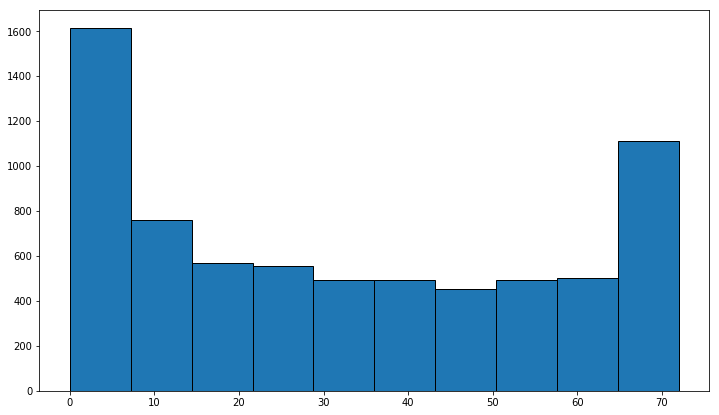

In [11]:
fig=plt.figure(figsize=(12,7))
plt.hist(telco["tenure"],edgecolor="black")
plt.show()


# 2)How is the distribution of Monthly Charges?

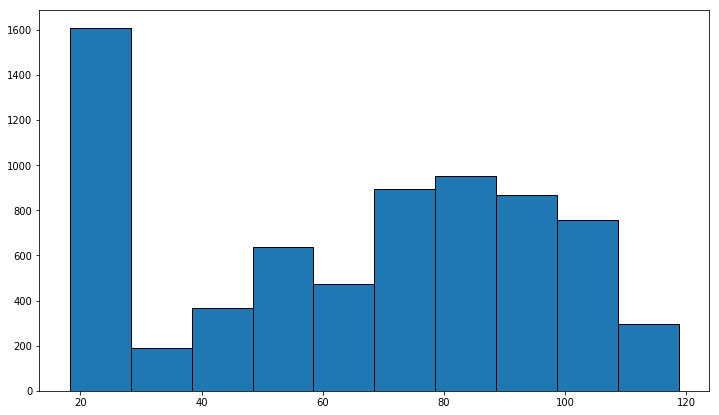

In [12]:
fig=plt.figure(figsize=(12,7))
plt.hist(telco["MonthlyCharges"],edgecolor="black")
plt.show()

# 3)What is the part to whole relationship of Internet Service?

In [13]:
int_serv=telco.groupby(["InternetService"]).size()
int_serv=pd.DataFrame(int_serv,columns=["Count"]).reset_index()
int_serv

,InternetService,Count
0,DSL,2421
1,Fiber optic,3096
2,No,1526


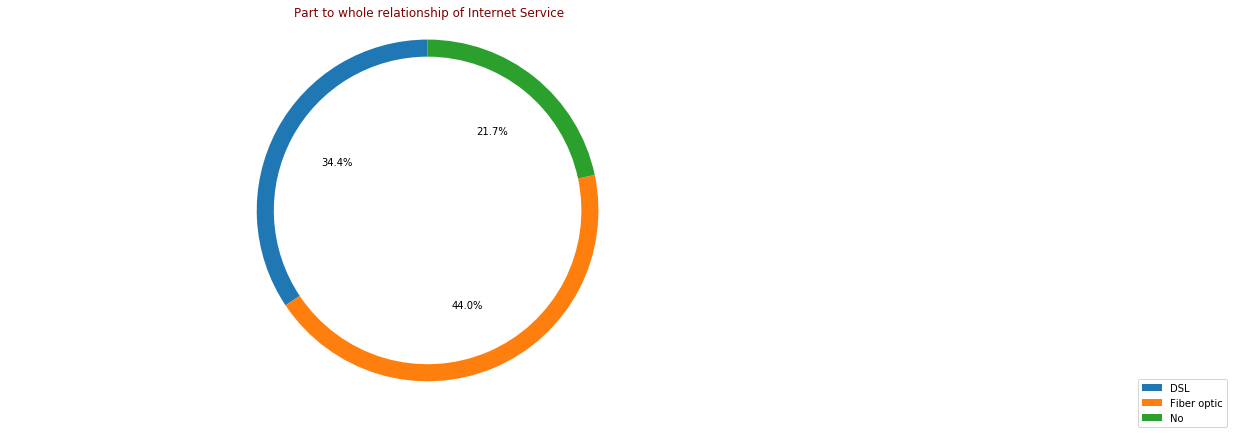

In [37]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(15,7))
pie= plt.pie(int_serv["Count"],
             #labels=int_serv["InternetService"],
             autopct="%0.1f%%", 
             wedgeprops= dict(width=0.1),
             radius=1,
             startangle=90)

plt.title("Part to whole relationship of Internet Service", loc= 'center', color= 'maroon')
plt.axis("equal")
#plt.show()

plt.legend(pie[0], labels=int_serv['InternetService'], loc= "center", bbox_to_anchor= (1.4,0))
plt.show()

# 4)What contract is most common?What is the percent of most common contract?

In [38]:
telco_cont=telco.groupby(["Contract"]).size()
telco_cont=pd.DataFrame(telco_cont,columns=["Count"]).reset_index()
telco_cont

,Contract,Count
0,Month-to-month,3875
1,One year,1473
2,Two year,1695


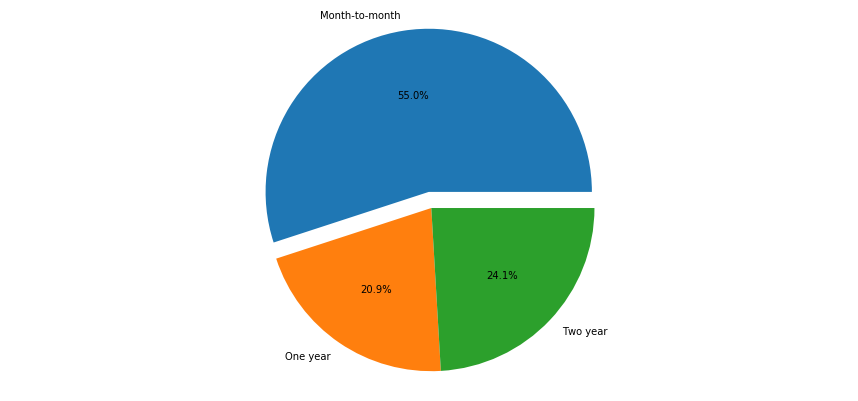

In [39]:
fig=plt.figure(figsize=(15,7))
plt.pie(telco_cont["Count"],labels=telco_cont["Contract"],autopct="%0.1f%%",explode=(.1,0,0))
plt.axis("equal")
plt.show()

# 4) What is the part to whole relationship of Multiple Lines?

In [40]:
telco_ml=telco.groupby(["MultipleLines"]).size()
telco_ml=pd.DataFrame(telco_ml,columns=["Count"]).reset_index()
telco_ml

,MultipleLines,Count
0,No,3390
1,No phone service,682
2,Yes,2971


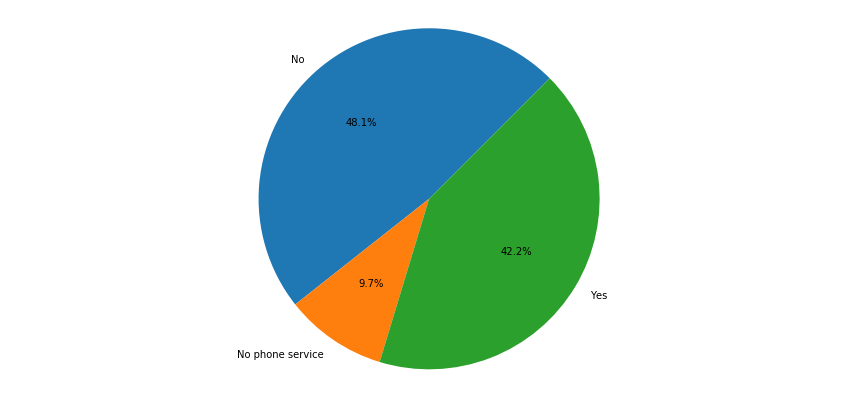

In [41]:
fig=plt.figure(figsize=(15,7))
plt.pie(telco_ml["Count"],labels=telco_ml["MultipleLines"],autopct="%0.1f%%",startangle=45)
plt.axis("equal")
plt.show()

# 5)What is the percentage of churn and not churn?

In [42]:
telco_churn=telco.groupby(["Churn"]).size()
telco_churn=pd.DataFrame(telco_churn,columns=["Count"]).reset_index()
telco_churn

,Churn,Count
0,No,5174
1,Yes,1869


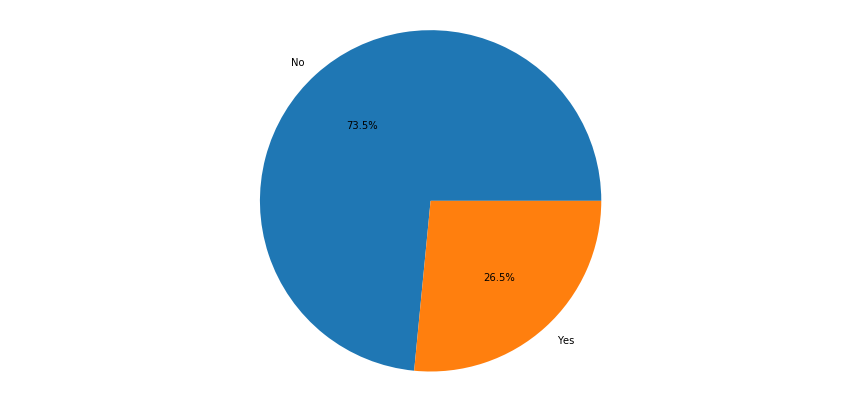

In [43]:
fig=plt.figure(figsize=(15,7))
plt.pie(telco_churn["Count"],labels=telco_churn["Churn"],autopct="%0.1f%%")
plt.axis("equal")
plt.show()

# 6) What is the percentage of SeniorCitizens?

In [44]:
telco_sc=telco.groupby(["SeniorCitizen"]).size()
telco_sc=pd.DataFrame(telco_sc,columns=["Count"]).reset_index()
telco_sc

,SeniorCitizen,Count
0,0,5901
1,1,1142


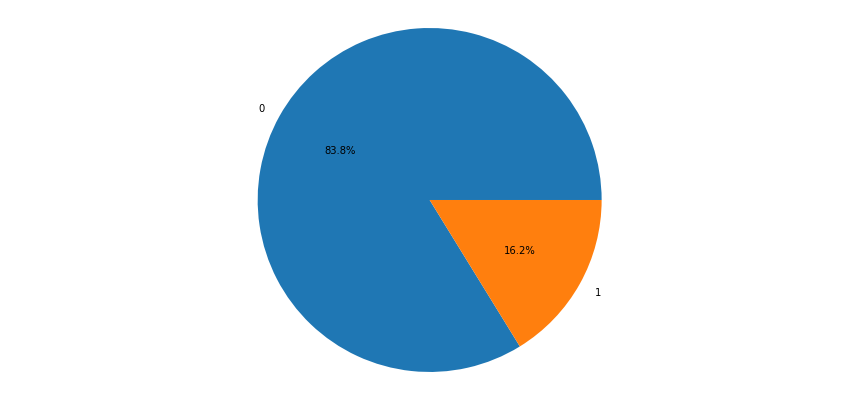

In [45]:
fig=plt.figure(figsize=(15,7))
plt.pie(telco_sc["Count"],labels=telco_sc["SeniorCitizen"],autopct='%0.1f%%')
plt.axis("equal")
plt.show()

In [46]:
pmt_by_gdr= telco.groupby(['PaymentMethod', 'gender']).size()
pmt_by_gdr= pd.DataFrame(pmt_by_gdr)
pmt_by_gdr= pmt_by_gdr.reset_index()
pmt_by_gdr= pmt_by_gdr.rename(columns={0:'Count'})

In [36]:
pmt_by_gdr

,PaymentMethod,gender,Count
0,Bank transfer (automatic),Female,788
1,Bank transfer (automatic),Male,756
2,Credit card (automatic),Female,752
3,Credit card (automatic),Male,770
4,Electronic check,Female,1170
5,Electronic check,Male,1195
6,Mailed check,Female,778
7,Mailed check,Male,834


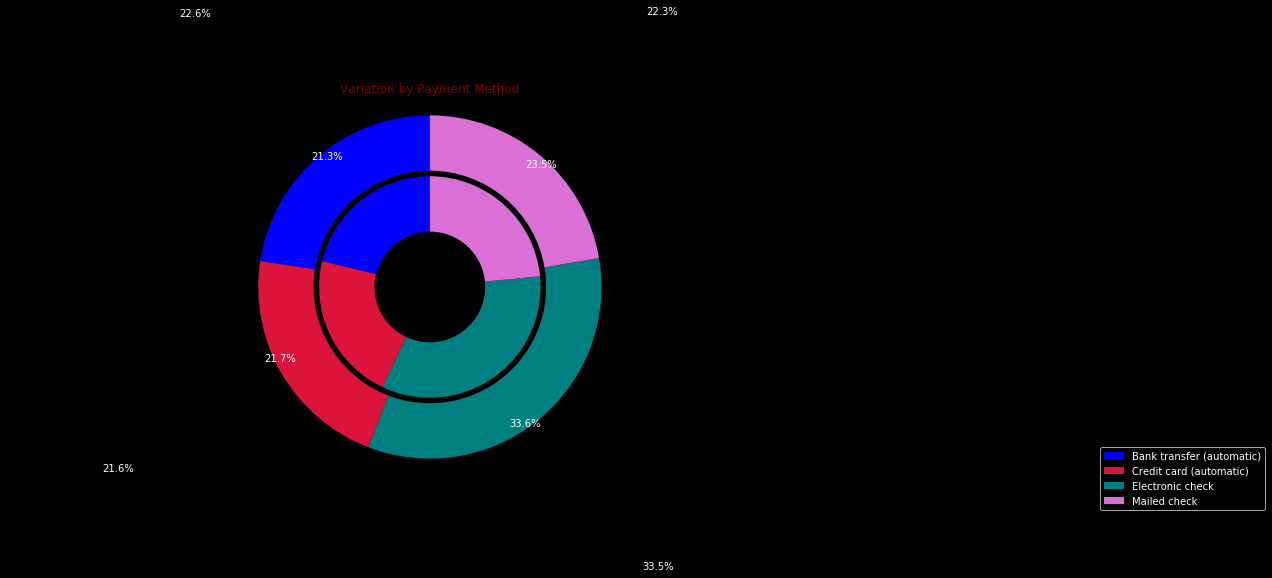

In [104]:
#wedgeprop= width of donut chart, pctdistance= distance of percentage, radius= radius of the donut chart
plt.figure(figsize=(15,7))
col=['blue', 'crimson', 'teal', 'orchid']
pie= plt.pie(pmt_by_gdr[pmt_by_gdr['gender']=='Male']['Count'],
             #labels=int_serv["InternetService"],
             autopct="%0.1f%%", pctdistance= 1.5, startangle= 90, 
             wedgeprops= dict(width=0.5),
             radius=1,
             colors= col)

pie= plt.pie(pmt_by_gdr[pmt_by_gdr['gender']=='Female']['Count'],
             #labels=int_serv["InternetService"],
             autopct="%0.1f%%", pctdistance= 2.1, startangle= 90, 
             wedgeprops= dict(width=0.5),
             radius=1.55,
             colors= col)

plt.title("Variation by Payment Method", loc= 'center', color= 'maroon')
plt.axis("equal")
#plt.show()

plt.legend(pie[0], labels=pmt_by_gdr[pmt_by_gdr['gender']=='Female']['PaymentMethod'], loc= "center", bbox_to_anchor= (1.4,0))
plt.show()

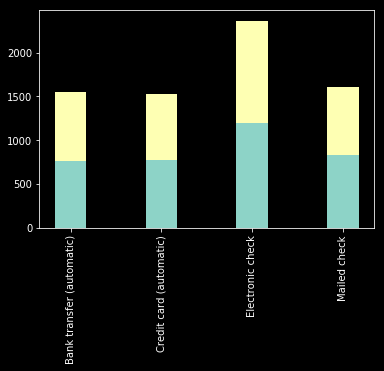

In [72]:
col=['blue', 'crimson', 'teal', 'orchid']
plt.bar(pmt_by_gdr[pmt_by_gdr['gender']=='Male']['PaymentMethod'],
             #labels=int_serv["InternetService"], 
             pmt_by_gdr[pmt_by_gdr['gender']=='Male']['Count'],
             width= 0.35)

#here bottom is used to avoid overlap 
plt.bar(pmt_by_gdr[pmt_by_gdr['gender']=='Female']['PaymentMethod'],
             #labels=int_serv["InternetService"], 
             pmt_by_gdr[pmt_by_gdr['gender']=='Female']['Count'],
        bottom= pmt_by_gdr[pmt_by_gdr['gender']=='Male']['Count'],
             width= 0.35)

plt.xticks(rotation= 'vertical')
plt.show()


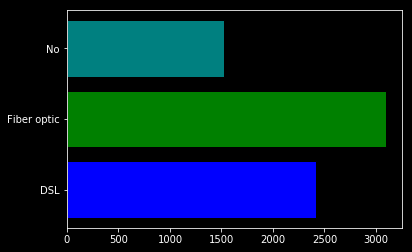

In [67]:
plt.barh(int_serv['InternetService'], int_serv['Count'], edgecolor='black', color= ['blue', 'green', 'teal', 'maroon'])
plt.show
#plt.style.use is to change the style
plt.style.use('dark_background')

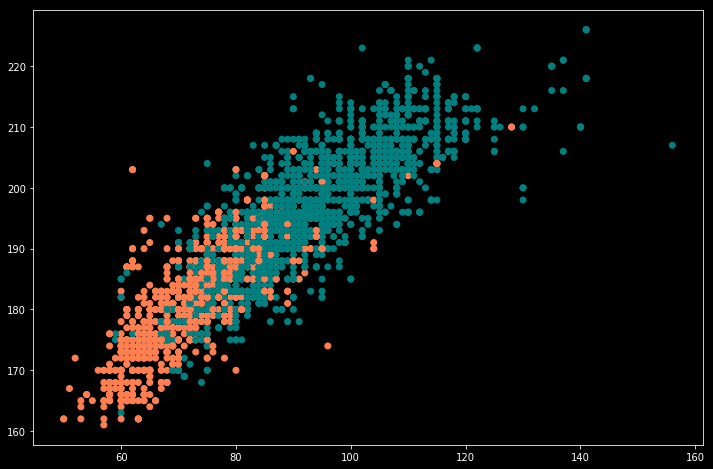

In [77]:
athletes= pd.read_csv('D:/DV_Term2/athlete_events.csv')
basketball= athletes[athletes['Sport']== 'Basketball']
fig= plt.figure(figsize=(12,8))
colors= {'M': 'teal', 'F': 'coral'}
plt.scatter(basketball['Weight'], basketball['Height'],
           c= basketball['Sex'].apply(lambda x: colors[x]))

#plt.legend(scatter[0], labels= basketball[basketball['Sex']=='F']['Sport'], loc= "center", bbox_to_anchor= (1.4,0))

In [94]:
air= pd.read_excel('D:/DV_Term2/AirQualityUCI.xlsx')

In [95]:
air= air[air['PT08.S1(CO)']> 0]

In [92]:
#air = air.drop('Unnamed: 15', axis=1)
#air = air.drop('Unnamed: 16', axis=1)

In [96]:
air.shape

(8991, 15)

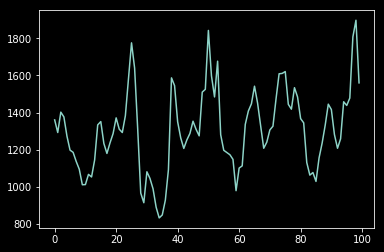

In [98]:
fig= plt.figure()
plt.plot(air_100['PT08.S1(CO)'])
plt.show()

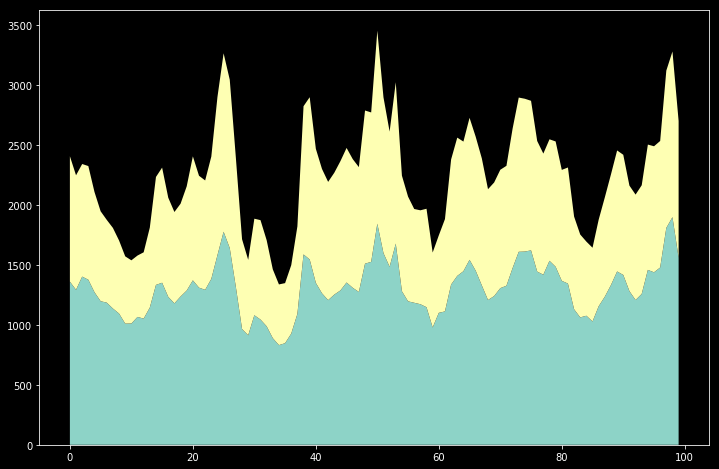

In [100]:
fig= plt.figure(figsize=(12,8))
plt.stackplot(air_100.index, air_100['PT08.S1(CO)'], air_100['PT08.S2(NMHC)'])
plt.show()